In [1]:
import tensorflow as tf
from tensorflow import keras
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import misc
import cv2 as cv

In [2]:
path_classes = '../Img/'
classes_names = sorted(os.listdir(path_classes))
dic_imgs ={}

for i, name_class in enumerate(classes_names):
    dic_imgs[classes_names[i]]=np.array(os.listdir(path_classes + classes_names[i]))
    print "class: ", name_class, " total samples: ", len(dic_imgs[classes_names[i]])

class:  Sample001  total samples:  144
class:  Sample002  total samples:  128
class:  Sample003  total samples:  108
class:  Sample004  total samples:  80
class:  Sample005  total samples:  68
class:  Sample006  total samples:  81
class:  Sample007  total samples:  78
class:  Sample008  total samples:  83
class:  Sample009  total samples:  42
class:  Sample010  total samples:  71
class:  Sample011  total samples:  669
class:  Sample012  total samples:  146
class:  Sample013  total samples:  319
class:  Sample014  total samples:  317
class:  Sample015  total samples:  679
class:  Sample016  total samples:  129
class:  Sample017  total samples:  207
class:  Sample018  total samples:  259
class:  Sample019  total samples:  60
class:  Sample020  total samples:  100
class:  Sample021  total samples:  125
class:  Sample022  total samples:  291
class:  Sample023  total samples:  229
class:  Sample024  total samples:  474
class:  Sample025  total samples:  501
class:  Sample026  total samples:

In [6]:
X=[];
Y=[];
resize_value =100
for i in range(len(classes_names)):
    for j in range(len(dic_imgs[classes_names[i]])):

        path_image = path_classes+classes_names[i]+'/'+dic_imgs[classes_names[i]][j];
        img=cv.imread(path_image);
        img=cv.cvtColor(img,cv.COLOR_BGR2GRAY)*1.;
        img=cv.resize(img,(100,100));
        flatt_img = img.reshape(resize_value*resize_value)
        X.append(flatt_img)
        Y.append(i)

X = np.r_[X]        
Y = np.r_[Y]

In [10]:
print X.shape
print Y.shape

(7633, 10000)
(7633,)


In [11]:
from sklearn.model_selection import train_test_split
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=test_size)
print y_test

[14 13 27 ... 10  7 13]


In [13]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

GN_est = GaussianNB()
RF_est = RandomForestClassifier(n_estimators=40)
SV_est = SVC(kernel='rbf')
KN_est = KNeighborsClassifier(n_neighbors=10)

0.5239030779305829


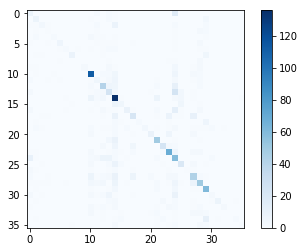

In [17]:
KN_est.fit(X_train,y_train)
KN_pr = KN_est.predict(X_test)
print (KN_est.score(X_test,y_test))
cm_test = confusion_matrix(y_test, KN_pr)

plt.imshow(cm_test, interpolation="nearest", cmap=plt.cm.Blues);
plt.colorbar();

0.058284217419777344


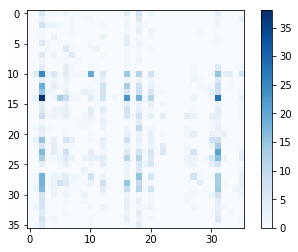

In [19]:
GN_est.fit(X_train,y_train)
GN_pr = GN_est.predict(X_test)
print (GN_est.score(X_test,y_test))
cm_test = confusion_matrix(y_test, GN_pr)

plt.imshow(cm_test, interpolation="nearest", cmap=plt.cm.Blues);
plt.colorbar();

0.6070726915520629


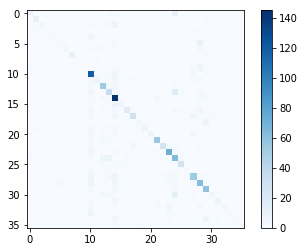

In [20]:
RF_est.fit(X_train,y_train)
RF_pr = RF_est.predict(X_test)
print (RF_est.score(X_test,y_test))
cm_test = confusion_matrix(y_test, RF_pr)

plt.imshow(cm_test, interpolation="nearest", cmap=plt.cm.Blues);
plt.colorbar();

/home/jhon/.local/lib/python2.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.1008513425016372


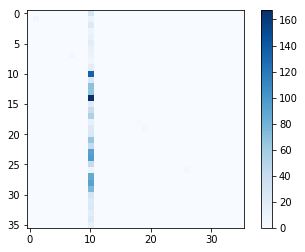

In [21]:
SV_est.fit(X_train,y_train)
SV_pr = SV_est.predict(X_test)
print (SV_est.score(X_test,y_test))
cm_test = confusion_matrix(y_test, SV_pr)

plt.imshow(cm_test, interpolation="nearest", cmap=plt.cm.Blues);
plt.colorbar();